<div style="text-align: center"> <h1>Statistical Analysis of 68 patients with Epileptic Seizures</h1></div>

In [1]:
#Libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Reading our csv file with information regarding the patients we are investigating on
df = pd.read_csv("seizures.csv")
#print dataframe
df

,Subject,Seizure,OnsetClonic,GTCS,Discard
0,6,1,37.0,True,No
1,6,2,NaN,False,No
2,12,1,42.0,True,No
3,15,1,96.0,True,No
4,16,1,39.0,True,No
...,...,...,...,...,...
215,321,12,NaN,False,No
216,321,13,NaN,False,No
217,321,14,NaN,False,No
218,321,15,57.0,True,Small


In [3]:
print(df.shape) #print the size of the dataframe 

(220, 5)


<div style="text-align: left"> <h3>I have 220 seizures/rows with 5 columns giving characteristics for each case.</h3></div>

In [4]:
#Getting all the subjects and their seizures which are tonic-clonic/generalized cases.
generalized = df[df.GTCS == True] 
generalized

,Subject,Seizure,OnsetClonic,GTCS,Discard
0,6,1,37.0,True,No
2,12,1,42.0,True,No
3,15,1,96.0,True,No
4,16,1,39.0,True,No
5,23,4,123.0,True,No
...,...,...,...,...,...
198,308,1,54.0,True,No
199,317,1,79.0,True,No
200,317,2,53.0,True,No
201,317,3,57.0,True,No


In [5]:
#Getting all the subjects and their seizures which are focal cases
focal = df[df.GTCS == False]
focal

,Subject,Seizure,OnsetClonic,GTCS,Discard
1,6,2,NaN,False,No
8,30,2,NaN,False,Small
9,30,3,NaN,False,No
10,30,4,NaN,False,No
11,34,3,NaN,False,No
...,...,...,...,...,...
214,321,11,NaN,False,No
215,321,12,NaN,False,No
216,321,13,NaN,False,No
217,321,14,NaN,False,No


In [6]:
generalized = df.Subject[df.GTCS == True] 
generalized
count_gen = len(generalized.axes[0])
print("We have "+str(count_gen)+" generalized cases.")

We have 72 generalized cases.


In [7]:
focal = df.Subject[df.GTCS == False] 
focal
count_focal = len(focal.axes[0])
print("We have "+str(count_focal)+" focal cases.")

We have 148 focal cases.


<div style="text-align: left"> <h3>I have 72 cases of generalized epilepsy and 148 cases of localized epilepsy. So, the model we will build must meet this categorization.</h3></div>

In [8]:
print(count_gen/count_focal)
print("We have the double amount focal cases compared to the generalized ones.")

0.4864864864864865
We have the double amount focal cases compared to the generalized ones.


In [9]:
print(count_gen/(count_gen+count_focal))
print("One third of our dataset refers to generalized seizures.")

0.32727272727272727
One third of our dataset refers to generalized seizures.


<div style="text-align: left"> <h3>Our data set has twice the number of generalized cases compared to localized cases of epilepsy. In addition, one third of the data set corresponds to cases of generalized epilepsy.</h3></div>

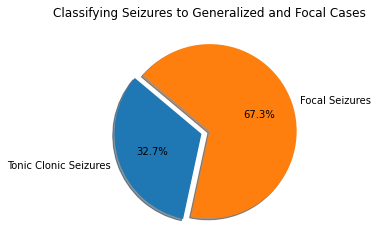

In [10]:
y = np.array([count_gen, count_focal])
mylabels = ["Tonic Clonic Seizures", "Focal Seizures"]
myexplode = [0.1, 0]
plt.title("Classifying Seizures to Generalized and Focal Cases")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

<div style="text-align: left"> <h3>In the pie chart above, we visualize the percentages of generalized and localized epilepsy.</h3></div>

<div style="text-align: left"> <h3> The OnsetClonic column is the recording of the moment (in seconds) at which the seizure "passes" into its clonic phase.</h3></div>

In [11]:
mean = df.OnsetClonic.mean()
print("For all the cases we have in the dataset, the average generalization of each seizure starts at "+str(round(mean))+" seconds inside the seizure.")

For all the cases we have in the dataset, the average generalization of each seizure starts at 86 seconds inside the seizure.


<div style="text-align: left"> <h3>We observe that a seizure, if generalized, will do so towards the end of the time period for which it lasts. 86 seconds (1 minute 43 seconds), since a seizure lasts from 30 seconds to 2 minutes, is the average for the seizures we have, so it really generalizes the seizure towards the end.
</h3></div>

In [12]:
max = df.OnsetClonic.max()
max

1026.0

 <div style="text-align: left"> <h3>1026 seconds is 17 minutes and is longer than the 5 minutes we use as the upper limit of a normal seizure.</h3></div>

In [13]:
min = df.OnsetClonic.min()
min

0.0

<div style="text-align: left"> <h3>By calculating min, we see that even a seizure may not be generalized later but be a generalized case from scratch.</h3></div>

<div style="text-align: left"> <h3>We consider generalized cases that exceed the five-minute time limit as extreme or emergency cases.</h3></div>

In [14]:
emergencies = df[(df.OnsetClonic >= 300) & (df.GTCS == True)]
count_em = len(emergencies.axes[0])
print("We have "+str(count_em)+" emergency cases.")
emergencies

We have 3 emergency cases.


,Subject,Seizure,OnsetClonic,GTCS,Discard
27,50,11,1026.0,True,No
113,180,2,622.0,True,No
148,218,8,339.0,True,No


<div style="text-align: left"> <h3>Beyond the emergency generalized cases, we find how many generalized cases are normal.</h3></div>

In [15]:
normal = df[(df.OnsetClonic < 300) & (df.GTCS == True)]
count_norm = len(normal.axes[0])
print("We have "+str(count_norm)+" normal generalized seizure cases.")
normal

We have 69 normal generalized seizure cases.


,Subject,Seizure,OnsetClonic,GTCS,Discard
0,6,1,37.0,True,No
2,12,1,42.0,True,No
3,15,1,96.0,True,No
4,16,1,39.0,True,No
5,23,4,123.0,True,No
...,...,...,...,...,...
198,308,1,54.0,True,No
199,317,1,79.0,True,No
200,317,2,53.0,True,No
201,317,3,57.0,True,No


<div style="text-align: left"> <h3>
   At the same time, we also find cases of local epilepsy that "pass" into a clonic phase, because there is such a category of focal seizure, and cases of simply local epilepsy without a clonic phase.</h3></div>

In [16]:
c_focal = df[(df.OnsetClonic < 300) & (df.GTCS == False)]
count_fc = len(c_focal.axes[0])
print("We have "+str(count_fc)+" focal seizure cases with clonic characteristics.")
c_focal

We have 7 focal seizure cases with clonic characteristics.


,Subject,Seizure,OnsetClonic,GTCS,Discard
59,100,7,63.0,False,No
87,155,1,59.0,False,No
114,181,1,58.0,False,No
160,227,1,30.0,False,No
166,229,3,85.0,False,No
170,248,4,24.0,False,No
189,292,4,164.0,False,No


In [17]:
just_focal = df[(df.OnsetClonic.isnull()) & (df.GTCS == False)]
count_just_focal = len(just_focal.axes[0])
print("We have "+str(count_just_focal)+" just focal seizure cases.")
just_focal

We have 141 just focal seizure cases.


,Subject,Seizure,OnsetClonic,GTCS,Discard
1,6,2,NaN,False,No
8,30,2,NaN,False,Small
9,30,3,NaN,False,No
10,30,4,NaN,False,No
11,34,3,NaN,False,No
...,...,...,...,...,...
214,321,11,NaN,False,No
215,321,12,NaN,False,No
216,321,13,NaN,False,No
217,321,14,NaN,False,No


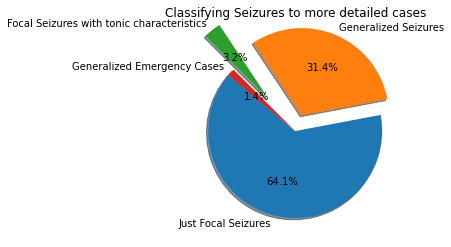

In [18]:
y = np.array([count_just_focal, count_norm, count_fc, count_em])
mylabels = ["Just Focal Seizures", "Generalized Seizures", "Focal Seizures with tonic characteristics", "Generalized Emergency Cases"]
plt.title("Classifying Seizures to more detailed cases")
explode = (0, 0.2, 0.5, 0)
plt.pie(y, labels = mylabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

<div style="text-align: left"> <h3>We distributed the last four categories above in another pie chart.</h3></div>

<div style="text-align: left"> <h3>Let's check the percentage of patients who have 1 seizure corresponding to them or more than one.</h3></div>

In [19]:
v = df.Subject.value_counts()
v

321    16
169    10
218     9
91      8
220     8
       ..
27      1
12      1
87      1
201     1
86      1
Name: Subject, Length: 68, dtype: int64

In [20]:
#I get all the items that have more than one readings, so I get all the patients that have more than one seizure to match them
more_than_one_seizure = df[df.Subject.isin(v.index[v.gt(1)])]
print(more_than_one_seizure)
patients_with_more_than_one_seizure = more_than_one_seizure.Subject.nunique()
print(patients_with_more_than_one_seizure)

     Subject  Seizure  OnsetClonic   GTCS Discard
0          6        1         37.0   True      No
1          6        2          NaN  False      No
7         30        1         70.0   True      No
8         30        2          NaN  False   Small
9         30        3          NaN  False      No
..       ...      ...          ...    ...     ...
215      321       12          NaN  False      No
216      321       13          NaN  False      No
217      321       14          NaN  False      No
218      321       15         57.0   True   Small
219      321       16          NaN  False      No

[198 rows x 5 columns]
46


In [21]:
countuniqval = df['Subject'].nunique() 
print("We have "+str(countuniqval)+" patients in total.")

We have 68 patients in total.


In [22]:
print("Out of the "+str(countuniqval)+" patients, the "+str(patients_with_more_than_one_seizure)+" are patients that appear to perform more than one seizure in our dataset.")

Out of the 68 patients, the 46 are patients that appear to perform more than one seizure in our dataset.


In [23]:
print("And out of the "+str(countuniqval)+" patients, the "+str(countuniqval - patients_with_more_than_one_seizure)+" are patients that appear to perform only one seizure in our dataset.")

And out of the 68 patients, the 22 are patients that appear to perform only one seizure in our dataset.


<div style="text-align: left"> <h3>The total number of 68 patients presents 22 patients with a single incident corresponding to them, while the remaining 46 patients have more than one incident to represent them.</h3></div>

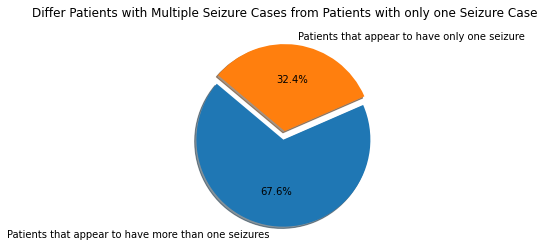

In [24]:
#Let's create a pie chart for this analogy that appeared through our analysis on the csv file
patients_with_only_one_seizure = countuniqval - patients_with_more_than_one_seizure
y = np.array([patients_with_more_than_one_seizure, patients_with_only_one_seizure])
mylabels = ["Patients that appear to have more than one seizures", "Patients that appear to have only one seizure"]
plt.title("Differ Patients with Multiple Seizure Cases from Patients with only one Seizure Case")
explode = (0.1, 0)
plt.pie(y, labels = mylabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [25]:
analogy1 = patients_with_only_one_seizure / countuniqval
analogy2 = patients_with_more_than_one_seizure / countuniqval
print(analogy1)
print(analogy2)

0.3235294117647059
0.6764705882352942


<div style="text-align: left"> <h3>In the pie chart distribution, we notice that a 70-30 ratio appears (70% patients with more than one seizure / 30% patients with a single seizure).</h3></div>

<div style="text-align: left"> <h3>Next, we also take advantage of the discard column to analyze the data. The method of discarding some views from the incidents serves the imbalance in generalized and local incidents that we initially observe.</h3></div>

In [26]:
#Getting all subjects and their seizures that have discard small or large
discarded = df[(df["Discard"] == 'Yes') | (df["Discard"] == 'Small') | (df["Discard"] == 'Large')]
count_dis = len(discarded.axes[0])
print("We have "+str(count_dis)+" seizure cases with discarded views (large and small included).")
discarded

We have 12 seizure cases with discarded views (large and small included).


,Subject,Seizure,OnsetClonic,GTCS,Discard
8,30,2,NaN,False,Small
14,34,7,NaN,False,Yes
36,74,3,NaN,False,Yes
38,74,10,45.0,True,Large
43,76,2,NaN,False,Yes
45,76,4,NaN,False,Yes
67,107,2,NaN,False,Yes
80,142,3,61.0,True,Small
138,213,2,26.0,True,Small
176,255,5,NaN,False,Large


In [27]:
#Getting all subjects and their seizures that don't have discard
not_discarded = df[df["Discard"] == 'No']
count_ndis = len(not_discarded.axes[0])
print("We have "+str(count_ndis)+" seizure cases with not discarded views.")
not_discarded

We have 208 seizure cases with not discarded views.


,Subject,Seizure,OnsetClonic,GTCS,Discard
0,6,1,37.0,True,No
1,6,2,NaN,False,No
2,12,1,42.0,True,No
3,15,1,96.0,True,No
4,16,1,39.0,True,No
...,...,...,...,...,...
214,321,11,NaN,False,No
215,321,12,NaN,False,No
216,321,13,NaN,False,No
217,321,14,NaN,False,No


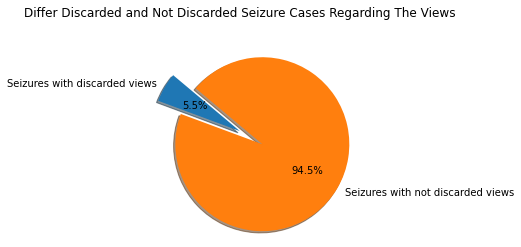

In [28]:
y = np.array([count_dis, count_ndis])
mylabels = ["Seizures with discarded views", "Seizures with not discarded views"]
plt.title("Differ Discarded and Not Discarded Seizure Cases Regarding The Views")
explode = (0, 0.3)
plt.pie(y, labels = mylabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

<div style="text-align: left"> <h3>We visualize above how many incidents have discarded views and we see a minimal percentage being rejected.</h3></div>

In [29]:
count_all = len(df.axes[0])
analogy3 = count_dis / count_all
analogy4 = count_ndis / count_all
print(analogy3)
print(analogy4)
print("We observe a very little amount of discarded cases.")

0.05454545454545454
0.9454545454545454
We observe a very little amount of discarded cases.


<div style="text-align: left"> <h3>Below we visualize for the discard views if both types (Large, Small) or only one were rejected.</h3></div>

In [30]:
ldiscarded = discarded[discarded["Discard"] == 'Large']
count_ldis = len(ldiscarded.axes[0])
print("We have "+str(count_ldis)+" seizure cases with discarded large views only.")
ldiscarded

We have 2 seizure cases with discarded large views only.


,Subject,Seizure,OnsetClonic,GTCS,Discard
38,74,10,45.0,True,Large
176,255,5,NaN,False,Large


In [31]:
sdiscarded = discarded[discarded["Discard"] == 'Small']
count_sdis = len(sdiscarded.axes[0])
print("We have "+str(count_sdis)+" seizure cases with discarded small views only.")
sdiscarded

We have 4 seizure cases with discarded small views only.


,Subject,Seizure,OnsetClonic,GTCS,Discard
8,30,2,NaN,False,Small
80,142,3,61.0,True,Small
138,213,2,26.0,True,Small
218,321,15,57.0,True,Small


In [32]:
bdiscarded = discarded[discarded["Discard"] == 'Yes']
count_bdis = len(bdiscarded.axes[0])
print("We have "+str(count_bdis)+" seizure cases with discarded both small and large views.")
bdiscarded

We have 6 seizure cases with discarded both small and large views.


,Subject,Seizure,OnsetClonic,GTCS,Discard
14,34,7,NaN,False,Yes
36,74,3,NaN,False,Yes
43,76,2,NaN,False,Yes
45,76,4,NaN,False,Yes
67,107,2,NaN,False,Yes
179,262,4,255.0,True,Yes


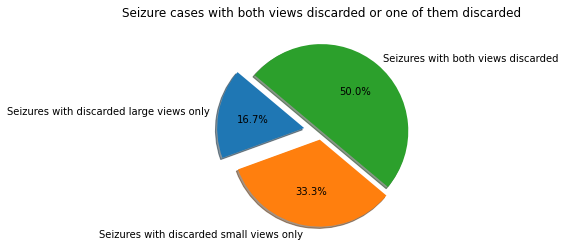

In [33]:
y = np.array([count_ldis, count_sdis, count_bdis])
mylabels = ["Seizures with discarded large views only", "Seizures with discarded small views only", "Seizures with both views discarded"]
explode = (0.2, 0.1, 0)
plt.pie(y, labels = mylabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Seizure cases with both views discarded or one of them discarded")
plt.show()

<div style="text-align: left"> <h3>Below we visualize how many generalized incidents have or not discarded views and how many local incidents have or not discarded views.</h3></div>

In [34]:
#Gathering how many generalized seizures are discarded 
gen_discarded = df[((df["Discard"] == 'Yes') | (df["Discard"] == 'Small') | (df["Discard"] == 'Large')) & (df["GTCS"] == True)]
count_gdis = len(gen_discarded.axes[0])
print("We have "+str(count_gdis)+" generalized seizure cases with discarded views (large and small included).")
gen_discarded

We have 5 generalized seizure cases with discarded views (large and small included).


,Subject,Seizure,OnsetClonic,GTCS,Discard
38,74,10,45.0,True,Large
80,142,3,61.0,True,Small
138,213,2,26.0,True,Small
179,262,4,255.0,True,Yes
218,321,15,57.0,True,Small


In [35]:
#Gathering how many generalized seizures are not discarded 
gen_ndiscarded = df[(df["Discard"] == 'No') & (df["GTCS"] == True)]
count_gndis = len(gen_ndiscarded.axes[0])
print("We have "+str(count_gndis)+" generalized seizure cases without discarded views.")
gen_ndiscarded

We have 67 generalized seizure cases without discarded views.


,Subject,Seizure,OnsetClonic,GTCS,Discard
0,6,1,37.0,True,No
2,12,1,42.0,True,No
3,15,1,96.0,True,No
4,16,1,39.0,True,No
5,23,4,123.0,True,No
...,...,...,...,...,...
197,305,2,33.0,True,No
198,308,1,54.0,True,No
199,317,1,79.0,True,No
200,317,2,53.0,True,No


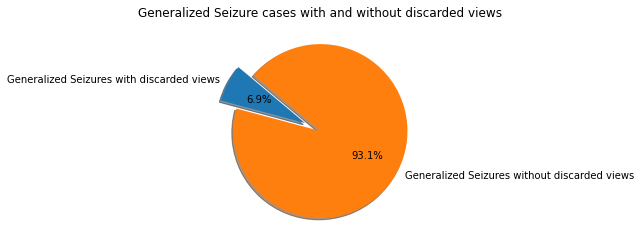

In [36]:
y = np.array([count_gdis, count_gndis])
mylabels = ["Generalized Seizures with discarded views", "Generalized Seizures without discarded views"]
explode = (0.2, 0)
plt.pie(y, labels = mylabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Generalized Seizure cases with and without discarded views")
plt.show()

In [37]:
#Gathering how many focal seizures are discarded 
foc_discarded = df[((df["Discard"] == 'Yes') | (df["Discard"] == 'Small') | (df["Discard"] == 'Large')) & (df["GTCS"] == False)]
count_fdis = len(foc_discarded.axes[0])
print("We have "+str(count_fdis)+" focal seizure cases with discarded views (large and small included).")
foc_discarded

We have 7 focal seizure cases with discarded views (large and small included).


,Subject,Seizure,OnsetClonic,GTCS,Discard
8,30,2,NaN,False,Small
14,34,7,NaN,False,Yes
36,74,3,NaN,False,Yes
43,76,2,NaN,False,Yes
45,76,4,NaN,False,Yes
67,107,2,NaN,False,Yes
176,255,5,NaN,False,Large


In [38]:
#Gathering how many focal seizures are not discarded 
foc_ndiscarded = df[(df["Discard"] == 'No') & (df["GTCS"] == False)]
count_fndis = len(foc_ndiscarded.axes[0])
print("We have "+str(count_fndis)+" focal seizure cases without discarded views.")
foc_ndiscarded

We have 141 focal seizure cases without discarded views.


,Subject,Seizure,OnsetClonic,GTCS,Discard
1,6,2,NaN,False,No
9,30,3,NaN,False,No
10,30,4,NaN,False,No
11,34,3,NaN,False,No
12,34,4,NaN,False,No
...,...,...,...,...,...
214,321,11,NaN,False,No
215,321,12,NaN,False,No
216,321,13,NaN,False,No
217,321,14,NaN,False,No


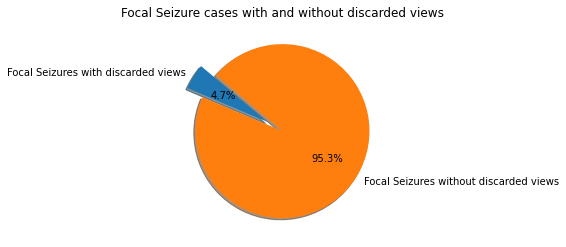

In [39]:
y = np.array([count_fdis, count_fndis])
mylabels = ["Focal Seizures with discarded views", "Focal Seizures without discarded views"]
explode = (0.2, 0)
plt.pie(y, labels = mylabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Focal Seizure cases with and without discarded views")
plt.show()

<div style="text-align: left"> <h3>Bar plots for Discard and GTCS variables.</h3></div>

<AxesSubplot:title={'center':'How many views have been discarded?'}>

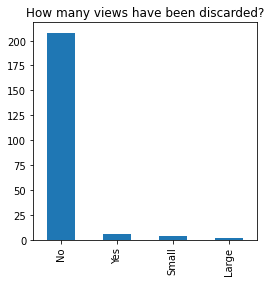

In [40]:
plt.rcParams['figure.figsize'] = [4, 4]
df.Discard.value_counts().plot(kind='bar', title = 'How many views have been discarded?')

<AxesSubplot:title={'center':'Focal vs Generalized'}>

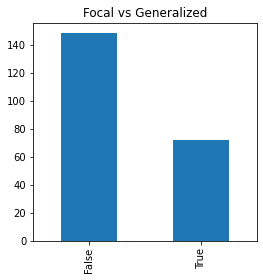

In [41]:
df.GTCS.value_counts().plot(kind='bar', title = 'Focal vs Generalized')

<div style="text-align: left"> <h3>We will see the display of two columns now and not work individually with one column. More specifically, we will see how many generalized, focal and generally how many seizures we have per patient.</h3></div> 

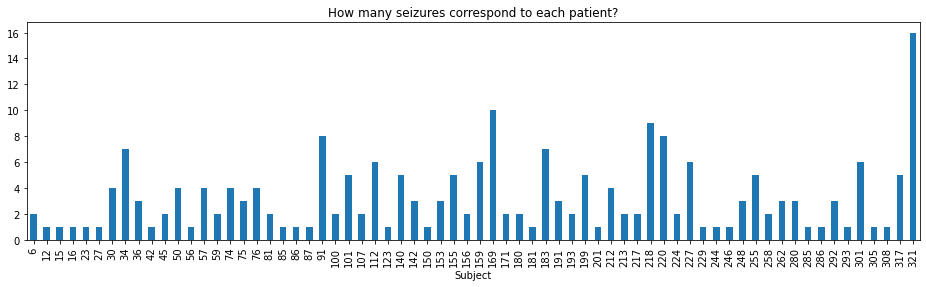

In [42]:
#Let's create a bar plot where we see how many seizures we have per patient
counts = df.groupby('Subject')['Seizure'].count()
counts.plot(kind='bar',
            title = "How many seizures correspond to each patient?",
            figsize=(16,4));               

In [43]:
generalized = df[df.GTCS == True] 
focal = df[df.GTCS == False]

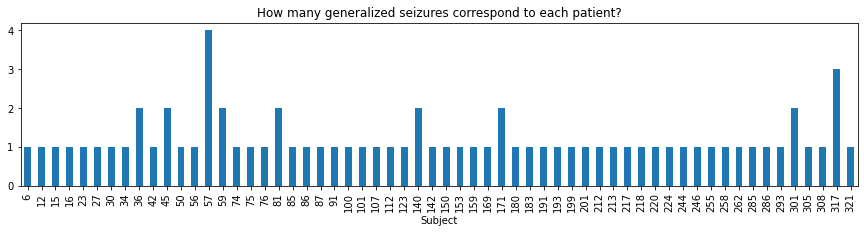

In [44]:
counts1 = generalized.groupby('Subject')['Seizure'].count()
counts1.plot(kind='bar',
            title = "How many generalized seizures correspond to each patient?",
            figsize=(15,3)); 

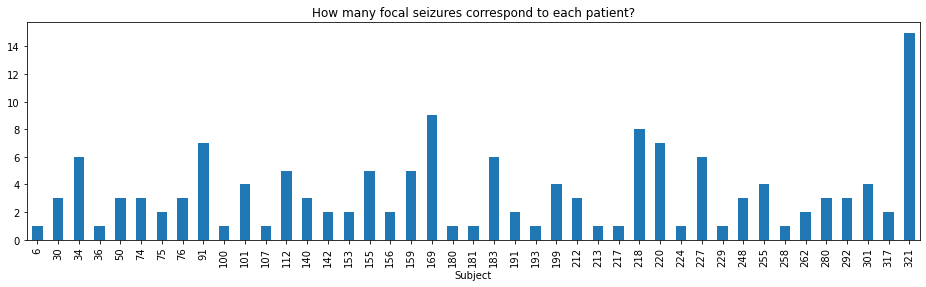

In [45]:
counts2 = focal.groupby('Subject')['Seizure'].count()
counts2.plot(kind='bar',
            title = "How many focal seizures correspond to each patient?",
            figsize=(16,4)); 

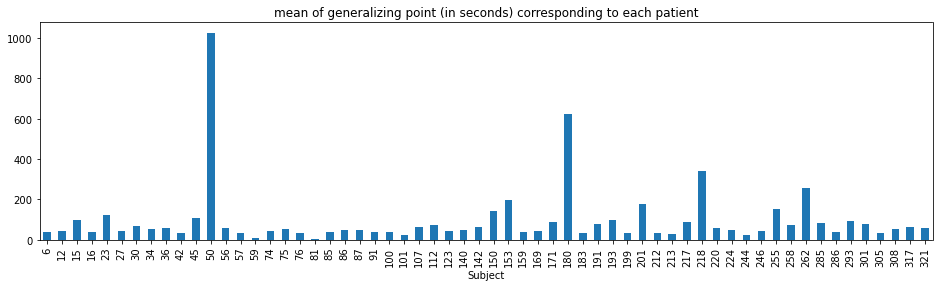

In [46]:
mean = generalized.groupby('Subject')['OnsetClonic'].mean()
mean.plot(kind='bar',
          title = "mean of generalizing point (in seconds) corresponding to each patient",
          figsize=(16,4)); 

In [47]:
secs = generalized.OnsetClonic
patients = generalized.Subject

<div style="text-align: left"> <h3>The following is a histogram showing the spectrum in time where most incidents generalize.</h3></div>

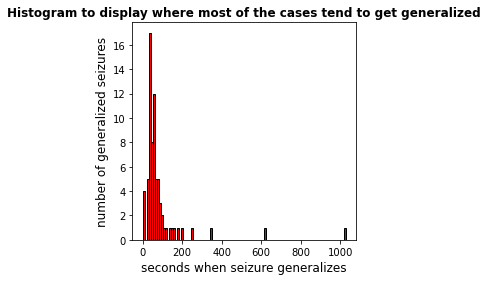

In [48]:
plt.hist(secs, density=False, color ='red', edgecolor='black', bins=100)
plt.rcParams['figure.figsize'] = [8, 8]
plt.title('Histogram to display where most of the cases tend to get generalized', fontsize=12, fontweight = "bold")
plt.xlabel('seconds when seizure generalizes', fontsize=12)
plt.ylabel('number of generalized seizures', fontsize=12)
plt.show()

<div style="text-align: left"> <h3>Observing carefully where the values 30 secs and 120 secs are, which are also the values ​​that delimit a normal period of time for an epileptic episode, we see that the majority of the starting points of the generalization of each seizure are in this range of values, so indeed a seizure tends to become generalized towards its end. We also see divergent values if in urgent circumstances, i.e. cases where the time period exceeds 5 minutes.
</h3></div> 

<div style="text-align: left"> <h3>This concludes the analysis of the 68 patients we examine in this data set.</h3></div>